In [1]:
using PyPlot

# Tarea 1

Fecha de envío del PR inicial: **26 de febrero**

Fecha de aceptación del PR: **12 de marzo**


## 1. Raíces de una ecuación de segundo grado

Implementen en julia una función que devuelva las raíces de una ecuación de segundo grado general con coeficientes reales. La función debe ser estable según el tipo ([type-stable](http://docs.julialang.org/en/release-0.5/manual/faq/?highlight=type%20stability#what-does-type-stable-mean)), lo que significa que el tipo del resultado sólamente depende del tipo de las entradas. En particular, muestren que su función devuelve raíces consistentes para $a=1$, $b=1$, $c=10^{-17}$.

La función debe estar documentada de manera apropiada, lo que significa que, al correr el Jupyter notebook de su tarea, la instrucción
```julia
? nombre_funcion
```
debe dar información apropiada.

Incluyan cualquier comentario prudente del algoritmo que usan, ya sea en el notebook (usando markdown) o en la propia función incluyendo comentarios.


In [2]:
doc"""
raices(a,b,c)

Esta funcion calcula las raices de un polinomio de segundo grado de la forma

\$ax^2 + bx + c = 0\$

con a, b y c reales utilizando

\$ x_{+-} = \frac{-b \pm \sqrt{b^2-4ac}}{2a}\$


El algoritmo evalua el discriminante $\Delta = b^2-4ac$ y hace los calculos necesarios:
1. si $\Delta = 0$ la funcion regresa $\frac{-b}{2a}$
2. si $\Delta < 0$ la funcion regresa el comentario "La funcion no tiene raices reales"
3. si $\Delta > 0$ la funcion regresa $X_{+}, X_{-}$
"""

function raices(a,b,c)
    
    if a == 0
        
        println("El polinomio no es de segundo grado.")
        return
        
    end
    
    det = b^2 - 4 * a * c
    
    if det < 0
        println(typeof(det))
        println("El polinomio no tiene raices reales.")
        return
        
    elseif det == 0
        println(typeof(det))
        return /(-b , (2 * a)), /(-b , (2 * a))
    
    else
        println(typeof(det))
        return /(-b + sqrt(det), 2 * a), /(-b - sqrt(det), 2 * a)
   
    end
end

raices

In [3]:
@code_warntype(raices(1,2,1))

Variables:
  #self#::#raices
  a::Int64
  b::Int64
  c::Int64
  det::Int64

Body:
  begin 
      NewvarNode(:(det::Int64))
      unless (a::Int64 === 0)::Bool goto 10 # line 23:
      # meta: location coreio.jl println 5
      SSAValue(0) = (Core.typeassert)(Base.STDOUT,Base.IO)::IO
      # meta: pop location
      (Base.print)(SSAValue(0),"El polinomio no es de segundo grado.",'\n')::Void # line 24:
      return
      10:  # line 28:
      det::Int64 = (Base.box)(Int64,(Base.sub_int)((Base.box)(Int64,(Base.mul_int)(b::Int64,b::Int64)),(Base.box)(Int64,(Base.mul_int)((Base.box)(Int64,(Base.mul_int)(4,a::Int64)),c::Int64)))) # line 30:
      unless (Base.slt_int)(det::Int64,0)::Bool goto 27 # line 31:
      # meta: location coreio.jl println 5
      SSAValue(1) = (Core.typeassert)(Base.STDOUT,Base.IO)::IO
      # meta: pop location
      (Base.print)(SSAValue(1),Int64,'\n')::Void # line 32:
      # meta: location coreio.jl println 5
      SSAValue(2) = (Core.typeassert)(Base.STDOUT,Base

In [4]:
? raices

search: RandomDevice



raices(a,b,c)

Esta funcion calcula las raices de un polinomio de segundo grado de la forma

$ax^2 + bx + c = 0$

con a, b y c reales utilizando

$ x_{+-} = \frac{-b \pm \sqrt{b^2-4ac}}{2a}$

El algoritmo evalua el discriminante $\Delta = b^2-4ac$ y hace los calculos necesarios:

1. si $\Delta = 0$ la funcion regresa $\frac{-b}{2a}$
2. si $\Delta < 0$ la funcion regresa el comentario "La funcion no tiene raices reales"
3. si $\Delta > 0$ la funcion regresa $X_{+}, X_{-}$


In [5]:
ints = [1,2,1]
x = raices(ints...)
println(x)
println(typeof(ints))
println(typeof(x))

Int64
(-1.0,-1.0)
Array{Int64,1}
Tuple{Float64,Float64}


In [6]:
abc = (1., 1., 1e-17)
x = raices(abc...)
println(x)
println(typeof(x))
println(typeof(abc))

Float64
(0.0,-1.0)
Tuple{Float64,Float64}
Tuple{Float64,Float64,Float64}


Vemos que el tipo Float64 no tiene la resolucion suficiente para darnos la raiz que esta cercana a 0, tal vez debido a la funcion sqrt().

In [7]:
big_abc = (BigFloat(1), BigFloat(1), BigFloat(1e-17))
x = raices(big_abc...)
println(x)
println(typeof(x))
println(typeof(big_abc))

BigFloat
(-1.000000000000000081542424054621926139376537277361837005370588849638847781510787e-17,-9.999999999999999899999999999999991845757594537807386062346272263816299462941115e-01)
Tuple{BigFloat,BigFloat}
Tuple{BigFloat,BigFloat,BigFloat}


Pero si utilizamos BigFloat() podemos obtener un valor mas cercano.

## 2. Promedio y varianza

(a) Escriban dos funciones (`promedio` y `varianza`) que calculen el promedio y la varianza de un vector de datos.

In [8]:
doc"""
promedio(arreglo)

Funcion que calcula el promedio aritmetico de los elementos de un arreglo utilizando

$\bar{x} = \frac{1}{n} \sum_{1}^{n} x_i$

"""

function promedio(arreglo)

    n = length(arreglo)     # Obtenemos la longitud del arreglo.
    promedio = 0.0          # Declaramos la variable promedio.
    
    for num = arreglo       # Hacemos la suma de todos los elementos del arreglo.
        promedio += num
    end
    
    promedio /= n           # Se calcula el promedio.
    
    return promedio
end

promedio(rand(2^20))  # llamamos a la funcion para que la compile.

0.4998305002615414

In [9]:
doc"""
varianza(arreglo)

Funcion que calcula la varianza de los elementos de un arreglo utilizando

$ \sigma = (\frac{1}{n} \sum_{1}^{n} x_{i}^{2}) - \bar{x}^{2} $

"""

function varianza(arreglo)
    n = length(arreglo)      # Se calcula la longitud del arreglo.    
    p = promedio(arreglo)    # Se calcula el promedio para ser utilizado en el calculo de la varianza.
    σ = 0.0                  # Se declara la variable que guardara el valor de la varianza.
    
    for num = arreglo        # Se itera una suma respecto a todo el arreglo.
        σ += (num - p)^2 
    end
    
    σ /= n                   # Se calcula la varianza.
    return σ
end

varianza(randn(1000))  # llamamos a la funcion para que la compile.

0.9805852114274224

(b) Comparen su resultado con lo que se obtiene al utilizar `mean` y `var`, que son las funciones nativas de Julia que hacen eso. En particular, consideren el siguiente vector de datos
```julia
v = 1.0e7 + randn(10^8)
```
¿Qué hace la función `randn(10^8)`?

La funcion randn(n) genera un arreglo de longitud n de valores aleatorios con distribucion normal de varianza 1.

Por alguna razon ni mi maquina ni juliabox me dejan usar randn(10^8), cuando trato de utilizarlo se muere el kernel.

In [10]:
v = 1.0e7 + randn(10^6);

In [11]:
p, m = promedio(v), mean(v)

(1.0000000000074236e7,1.000000000007377e7)

In [12]:
t_mine_prom = @elapsed promedio(v)
t_native_prom = @elapsed mean(v)

println("timepo de promedio = ", t_mine_prom)
println("timepo de mean = ", t_native_prom)
println(100 * t_mine_prom / t_native_prom, "% mas lento")

timepo de promedio = 0.001307918
timepo de mean = 0.00041189
317.5406055014688% mas lento


In [13]:
vf, vn = varianza(v), var(v)

(1.0008439491942074,1.000844950038946)

In [14]:
t_mine_vari = @elapsed varianza(v)
t_native_vari = @elapsed var(v)

println("timepo de varianza = ", t_mine_vari)
println("timepo de var = ", t_native_vari)
println(100 * t_mine_vari / t_native_vari, "% mas lento")

timepo de varianza = 0.002371601
timepo de var = 0.000722585
328.2106603375382% mas lento


(c) Implementen el [algoritmo recursivo](https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm), ampliamente desconocido, que  calcula el promedio (`promedio_rec`) y la varianza (`varianza_rec`) con una sóla lectura de los datos. Usen sus fuciones en el vector anterior y comparen sus resultados con los obtenidos en (a).

In [15]:
doc"""
prom_var_rec(arreglo)

regresa un arreglo con (promedio, varianza)

Funcion que calcula el promedio y la varianza con una sola lectura de los datos implementando el algoritmo recursivo encontrado [aqui](https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm).
"""

function prom_var_rec(arreglo)
    n = 0.0
    promedio = 0.0
    M2 = 0.0
    varianza = 0.0
    
    for x = arreglo
        n += 1.0
        delta = x - promedio
        promedio += delta / n
        delta2 = x - promedio
        M2 += delta * delta2
    end   
    
    varianza = M2 / (n-1.0)
     
    return promedio, varianza 
end

prom_var_rec(randn(1000000)) # llamamos a la funcion para que la compile.

(-0.0005879130184417674,1.001340439298258)

In [16]:
?prom_var_rec

search:



prom_var_rec(arreglo)

regresa un arreglo con (promedio, varianza)

Funcion que calcula el promedio y la varianza con una sola lectura de los datos implementando el algoritmo recursivo encontrado [aqui](https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm).


In [17]:
t_rec = @elapsed prom_var_rec(v)

0.008137928

In [18]:
prom_rec, var_rec = prom_var_rec(v)

(1.0000000000074182e7,1.0008449495077392)

In [19]:
println("funcion promedio ", p)
println("funcion mean     ", m)
println("funcion prom_rec ", prom_rec)

funcion promedio 1.0000000000074236e7
funcion mean     1.000000000007377e7
funcion prom_rec 1.0000000000074182e7


In [20]:
println("funcion varianza ", vf)
println("funcion var      ", vn)
println("funcion var_rec  ", var_rec)

funcion varianza 1.0008439491942074
funcion var      1.000844950038946
funcion var_rec  1.0008449495077392


(d) ¿Cuál de todos los algoritmos es el más rápido? (Pueden usar `@time` o `@elapsed`.) Usen vectores de varias longitudes, que cubran varios órdenes de magnitud.

In [21]:
n = 25
tiempos_pro = zeros(n)
tiempos_nat = zeros(n)
tiempos_rec = zeros(n)

for i = 1:n
    l = 1e4 + randn(2^i)
    
    tiempos_rec[i] = @elapsed prom_var_rec(l)
    tiempos_pro[i] = @elapsed promedio(l), varianza(l)
    tiempos_nat[i] = @elapsed mean(l), var(l)
    
#     println(prom_var_rec(l)[1])
#     println(promedio(l))
#     println(mean(l))
end

log_rec = log(tiempos_rec)
log_pro = log(tiempos_pro)
log_nat = log(tiempos_nat);

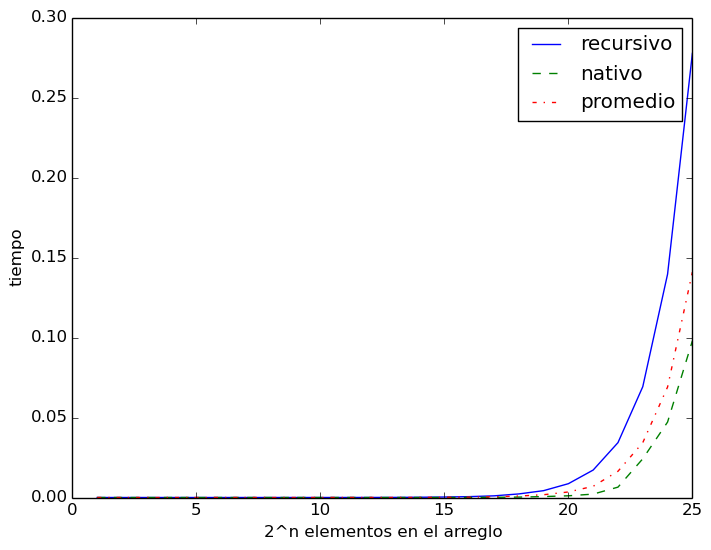

PyObject <matplotlib.text.Text object at 0x7fe5e0ab98d0>

In [22]:
plot(1:n, tiempos_rec,  linestyle = "-",  label = "recursivo")
plot(1:n, tiempos_nat,  linestyle = "--", label = "nativo")
plot(1:n, tiempos_pro,  linestyle = "-.", label = "promedio")
legend(loc="best")
ylabel("tiempo")
xlabel("2^n elementos en el arreglo")

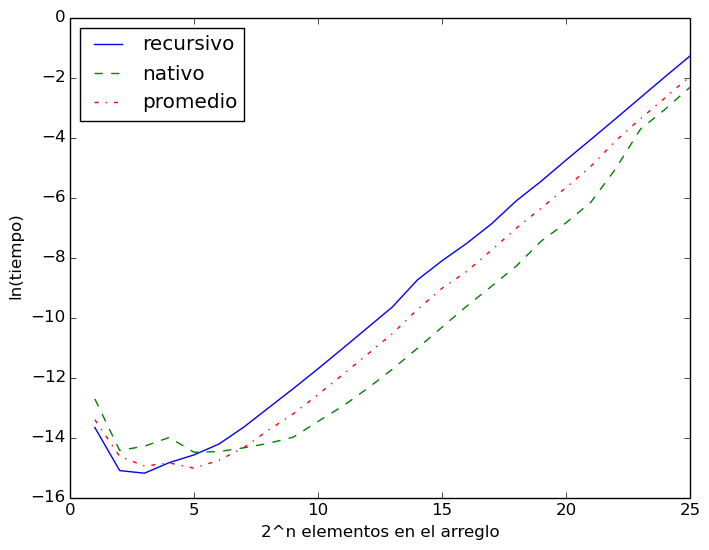

PyObject <matplotlib.text.Text object at 0x7fe5e0a93d50>

In [23]:
plot(1:n, log_rec,  linestyle = "-",  label = "recursivo")
plot(1:n, log_nat,  linestyle = "--", label = "nativo")
plot(1:n, log_pro,  linestyle = "-.", label = "promedio")
legend(loc="best")
ylabel("ln(tiempo)")
xlabel("2^n elementos en el arreglo")

Podemos ver que hay un rango de $2^1$ a $2^6$ donde tanto el algoritmo recursivo como el no recursivo son mas rapidos que el nativo, pero para longitudes mayores del arreglo, el algoritmo nativo es mas rapido.

## 3. Método de Simpson para integrar $f(x)$ en un intervalo dado

Implementen el método de Simpson para integrar una función arbitraria $f(x)$.

En análisis numérico, la regla o método de Simpson (nombrada así en honor de Thomas Simpson) y a veces llamada regla de Kepler es un método de integración numérica que se utiliza para obtener la aproximación de la integral:



$ \int_{a}^{b} f(x) dx \approx \frac{b-a}{6}[f(a) + 4f(\frac{a+b}{2})+f(b)]$


In [24]:
function integrador(f, a, b, n = 1000)

    h = linspace(a, b, n)                          # Se define la particion.
    Δ = (b - a) / n                                # Se define el tamaño del paso de integracion.
    
    err_max = 0.0                                  # Se declaran variables para guardar el area y el error.
    area = 0.0
    
    for i = h
        area += Δ * (f(i) + 4 * f(i + 0.5 * Δ) + f(i + Δ)) / 6
        
        err = Δ^5 * abs(f(i + 0.5 * Δ))^4 / 90     # Se calcula el error del paso, el error reportado sera el mayor
        if (err > err_max)                         # calculado para el intervalo de integracion.
            err_max = err
        end
    end
    
    return area, err_max
end

integrador (generic function with 2 methods)

Para mostrar el comportamiento del integrador realizaremos la siguiente integral

$ \int_0^x \sin(x)dx = 1 - cos(x)$ 

In [25]:
f(x) = sin(x)
int_f(x) = 1 - cos(x)

int_f (generic function with 1 method)

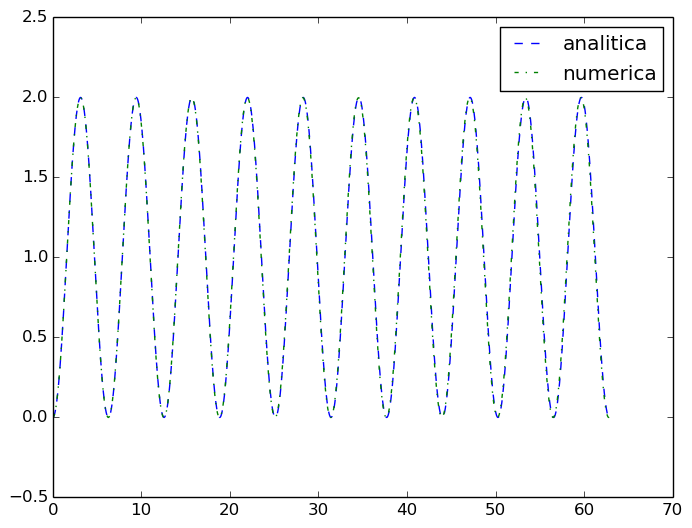

(-0.5,2.5)

In [26]:
rango = 0.0:0.01:(20 * pi)
func = int_f(rango)
int = similar(rango)
er = similar(rango)

for (i, j) = enumerate(rango)
    int[i], er[i] = integrador(f, 0.0, j)
    
end

plot(rango, func, linestyle = "--", label = "analitica")
plot(rango, int,  linestyle = "-.", label = "numerica")

legend()
ylim(-0.5,2.5)

$\int_0^x (3x^2 - 1) dx = x^3 - x$

In [27]:
g(x) = 3 * x.^2 - 1
int_g(x) = x.^3 - x

int_g (generic function with 1 method)

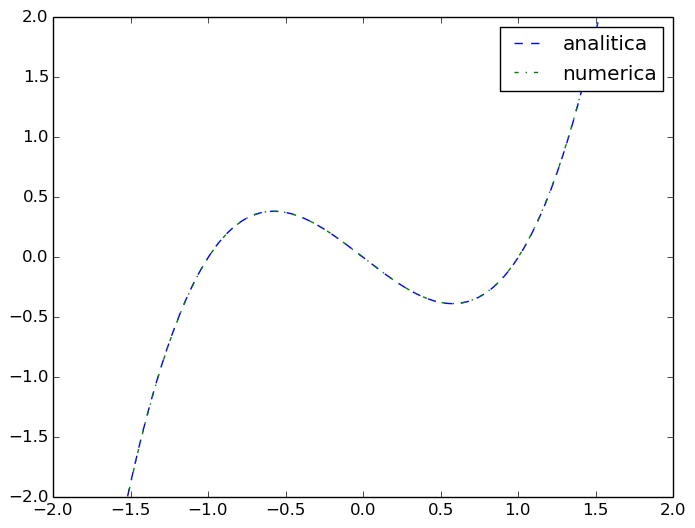

In [28]:
rango = -2:0.01:2
func = int_g(rango)
int = similar(rango)
er = similar(rango)

for (i, j) = enumerate(rango)
    int[i], er[i] = integrador(g, 0, j)
end

plot(rango, func, linestyle = "--", label = "analitica")
plot(rango, int,  linestyle = "-.",label = "numerica")
legend()
ylim(-2,2)
xlim(-2,2);